# Explore and map the data behind the "(De)escalation View" on VIEWS Dashboard 2.0

In [86]:
import requests
import pandas as pd
import json
#import matplotlib.pyplot as plt

# External
import geopandas as gpd
import sqlalchemy as sa

# VIEWS
from viewser.operations import fetch
from views_mapper2.mapper2 import *
from views_mapper2.BBoxWriter import *
from views_mapper2.dictionary_writer import *
from ingester3.config import source_db_path

## Get forecasts

In [2]:
# Define the URL you want to fetch data from. 

FORECASTS ='https://api.viewsforecasting.org/fatalities002_2023_08_t01/cm/'

# List the dataset specified in the URL above

dataset = 'fatalities002_2023_08_t01'

In [3]:
# Request function
r = requests.get(FORECASTS)

#The set page size 
PAGE_SIZE=1000

#Define the full request 
req_url=FORECASTS #+'/'+str()+'?'+'pagesize='+str(PAGE_SIZE)
    
master_list=[]
r=requests.get(req_url)
page_data=r.json()

list(page_data)

['next_page',
 'prev_page',
 'model_tree',
 'models',
 'row_count',
 'page_count',
 'page_cur',
 'start_date',
 'end_date',
 'data']

In [4]:
# The loop to keep fetching pages until all data is accessed 

master_list+=page_data['data']
    
while page_data['next_page'] != '':
    r=requests.get(page_data['next_page'])
    page_data=r.json()

    master_list+=page_data['data']
        
pred_raw=pd.DataFrame(master_list)

In [5]:
pred_raw

,country_id,month_id,name,gwcode,isoab,year,month,surrogate_mean_ch,surrogate_mean_nch_ln,main_dich,main_mean_ln,surrogate_mean_ch_ln,surrogate_mean_dem,surrogate_mean_nch,surrogate_mean_dem_ln,main_mean,surrogate_mean_imr,surrogate_mean_pop_ln,surrogate_mean_imr_ln,surrogate_mean_pop
0,1,525,Guyana,110,GUY,2023,9,0.0738,0.7550,0.0031,0.0168,0.0712,1.0462,1.1276,0.7160,0.0170,0.7607,0.1122,0.5657,0.1187
1,2,525,Suriname,115,SUR,2023,9,0.0738,0.3140,0.0031,0.0133,0.0712,0.1454,0.3689,0.1358,0.0134,0.5193,0.1063,0.4182,0.1122
2,3,525,Trinidad and Tobago,52,TTO,2023,9,0.0738,0.0954,0.0031,0.0056,0.0712,0.1394,0.1001,0.1305,0.0056,0.4944,0.1342,0.4017,0.1437
3,4,525,Venezuela,101,VEN,2023,9,6.2442,1.0647,0.0300,1.2850,1.9802,1.6683,1.8999,0.9814,2.6146,0.6946,0.8458,0.5275,1.3300
4,5,525,Samoa,990,WSM,2023,9,0.0738,0.0954,0.0031,0.0112,0.0712,0.2549,0.1001,0.2271,0.0112,0.4881,0.0942,0.3975,0.0988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6871,242,560,Tanzania,510,TZA,2026,8,0.2509,2.7369,0.0198,0.8218,0.2239,1.7964,14.4394,1.0283,1.2745,1.5266,1.7257,0.9269,4.6162
6872,243,560,Morocco,600,MAR,2026,8,0.2509,0.7667,0.0136,0.5523,0.2239,2.5724,1.1527,1.2732,0.7373,0.7758,1.2163,0.5742,2.3745
6873,244,560,Mauritania,435,MRT,2026,8,0.2509,1.4495,0.0147,0.6106,0.2239,3.3298,3.2611,1.4655,0.8416,1.4420,0.3502,0.8928,0.4193
6874,245,560,Sudan,625,SDN,2026,8,157.7025,2.7443,0.8378,4.6954,5.0670,2.6712,14.5543,1.3005,108.4431,1.7697,1.3997,1.0188,3.0542


## Get actuals

In [11]:
# Define the URL you want to fetch data from. 

UCDP ='https://api.viewsforecasting.org/predictors_fatalities002_0000_00/cm/'

In [12]:
# Request function
r = requests.get(UCDP)

#The set page size 
PAGE_SIZE=1000

#Define the full request 
req_url=UCDP #+'/'+str()+'?'+'pagesize='+str(PAGE_SIZE)
    
master_list_2=[]
r=requests.get(req_url)
page_data=r.json()

list(page_data)

['next_page',
 'prev_page',
 'model_tree',
 'models',
 'row_count',
 'page_count',
 'page_cur',
 'start_date',
 'end_date',
 'data']

In [13]:
# The loop to keep fetching pages until all data is accessed 

master_list_2+=page_data['data']
    
while page_data['next_page'] != '':
    r=requests.get(page_data['next_page'])
    page_data=r.json()

    master_list_2+=page_data['data']
        
ged_raw=pd.DataFrame(master_list_2)

In [14]:
ged_raw

,country_id,month_id,name,gwcode,isoab,year,month,vdem_v12_v2x_libdem,vdem_v12_v2xeg_eqdr,wb_wdi_sp_dyn_imrt_in,...,ucdp_ged_sb_best_sum,vdem_v12_v2xcl_acjst,ucdp_ged_os_best_sum,vdem_v12_v2x_rule,wb_wdi_sp_pop_totl,vdem_v12_v2x_civlib,wb_wdi_ny_gdp_pcap_kd,vdem_v12_v2x_gender,wb_wdi_sp_dyn_le00_in,ucdp_ged_ns_best_sum
0,1,121,Guyana,110,GUY,1990,1,0.222,0.606,46.9,...,0.0,0.794,0.0,0.515,747116.0,0.751,2386.0626,0.820,62.415,0.0
1,2,121,Suriname,115,SUR,1990,1,0.559,0.632,38.8,...,0.0,0.781,0.0,0.743,412756.0,0.861,6470.6371,0.706,64.230,0.0
2,3,121,Trinidad and Tobago,52,TTO,1990,1,0.618,0.828,26.7,...,0.0,0.895,0.0,0.862,1266518.0,0.892,6011.5579,0.828,68.272,0.0
3,4,121,Venezuela,101,VEN,1990,1,0.609,0.648,24.7,...,0.0,0.644,12.0,0.545,19750579.0,0.875,NaN,0.825,71.532,0.0
4,5,121,Samoa,990,WSM,1990,1,NaN,NaN,24.9,...,0.0,NaN,0.0,NaN,168186.0,NaN,2547.0491,NaN,67.658,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76794,242,529,Tanzania,510,TZA,2024,1,NaN,NaN,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
76795,243,529,Morocco,600,MAR,2024,1,NaN,NaN,NaN,...,4.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
76796,244,529,Mauritania,435,MRT,2024,1,NaN,NaN,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
76797,245,529,Sudan,625,SDN,2024,1,NaN,NaN,NaN,...,134.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,54.0


# Inspect the data

In [15]:
# Inspect the data to see that it looks correct

pred_raw

,country_id,month_id,name,gwcode,isoab,year,month,surrogate_mean_ch,surrogate_mean_nch_ln,main_dich,main_mean_ln,surrogate_mean_ch_ln,surrogate_mean_dem,surrogate_mean_nch,surrogate_mean_dem_ln,main_mean,surrogate_mean_imr,surrogate_mean_pop_ln,surrogate_mean_imr_ln,surrogate_mean_pop
0,1,525,Guyana,110,GUY,2023,9,0.0738,0.7550,0.0031,0.0168,0.0712,1.0462,1.1276,0.7160,0.0170,0.7607,0.1122,0.5657,0.1187
1,2,525,Suriname,115,SUR,2023,9,0.0738,0.3140,0.0031,0.0133,0.0712,0.1454,0.3689,0.1358,0.0134,0.5193,0.1063,0.4182,0.1122
2,3,525,Trinidad and Tobago,52,TTO,2023,9,0.0738,0.0954,0.0031,0.0056,0.0712,0.1394,0.1001,0.1305,0.0056,0.4944,0.1342,0.4017,0.1437
3,4,525,Venezuela,101,VEN,2023,9,6.2442,1.0647,0.0300,1.2850,1.9802,1.6683,1.8999,0.9814,2.6146,0.6946,0.8458,0.5275,1.3300
4,5,525,Samoa,990,WSM,2023,9,0.0738,0.0954,0.0031,0.0112,0.0712,0.2549,0.1001,0.2271,0.0112,0.4881,0.0942,0.3975,0.0988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6871,242,560,Tanzania,510,TZA,2026,8,0.2509,2.7369,0.0198,0.8218,0.2239,1.7964,14.4394,1.0283,1.2745,1.5266,1.7257,0.9269,4.6162
6872,243,560,Morocco,600,MAR,2026,8,0.2509,0.7667,0.0136,0.5523,0.2239,2.5724,1.1527,1.2732,0.7373,0.7758,1.2163,0.5742,2.3745
6873,244,560,Mauritania,435,MRT,2026,8,0.2509,1.4495,0.0147,0.6106,0.2239,3.3298,3.2611,1.4655,0.8416,1.4420,0.3502,0.8928,0.4193
6874,245,560,Sudan,625,SDN,2026,8,157.7025,2.7443,0.8378,4.6954,5.0670,2.6712,14.5543,1.3005,108.4431,1.7697,1.3997,1.0188,3.0542


In [16]:
# Inspect the data to see that it looks correct

ged_raw

,country_id,month_id,name,gwcode,isoab,year,month,vdem_v12_v2x_libdem,vdem_v12_v2xeg_eqdr,wb_wdi_sp_dyn_imrt_in,...,ucdp_ged_sb_best_sum,vdem_v12_v2xcl_acjst,ucdp_ged_os_best_sum,vdem_v12_v2x_rule,wb_wdi_sp_pop_totl,vdem_v12_v2x_civlib,wb_wdi_ny_gdp_pcap_kd,vdem_v12_v2x_gender,wb_wdi_sp_dyn_le00_in,ucdp_ged_ns_best_sum
0,1,121,Guyana,110,GUY,1990,1,0.222,0.606,46.9,...,0.0,0.794,0.0,0.515,747116.0,0.751,2386.0626,0.820,62.415,0.0
1,2,121,Suriname,115,SUR,1990,1,0.559,0.632,38.8,...,0.0,0.781,0.0,0.743,412756.0,0.861,6470.6371,0.706,64.230,0.0
2,3,121,Trinidad and Tobago,52,TTO,1990,1,0.618,0.828,26.7,...,0.0,0.895,0.0,0.862,1266518.0,0.892,6011.5579,0.828,68.272,0.0
3,4,121,Venezuela,101,VEN,1990,1,0.609,0.648,24.7,...,0.0,0.644,12.0,0.545,19750579.0,0.875,NaN,0.825,71.532,0.0
4,5,121,Samoa,990,WSM,1990,1,NaN,NaN,24.9,...,0.0,NaN,0.0,NaN,168186.0,NaN,2547.0491,NaN,67.658,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76794,242,529,Tanzania,510,TZA,2024,1,NaN,NaN,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
76795,243,529,Morocco,600,MAR,2024,1,NaN,NaN,NaN,...,4.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
76796,244,529,Mauritania,435,MRT,2024,1,NaN,NaN,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
76797,245,529,Sudan,625,SDN,2024,1,NaN,NaN,NaN,...,134.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,54.0


# Set prediction step (month) to analyze

## Find EndOFHistory in GED data

In [17]:
ged_raw['month_id'].max()

529

In [18]:
# Set EndOfHistory as t

t = ged_raw['month_id'].max() 
t

529

## Choose prediction step

In [19]:
step = 1 # Change here


In [20]:
step # Check that it matches value above

1

In [21]:
pred_month_to_plot = t+step 
pred_month_to_plot

530

# Filter out relevant columns

## Predictions

In [22]:
columns_to_keep = ['country_id', 'month_id', 'name', 'isoab', 'year', 'main_mean']

# creating new df
pred_filtered = pred_raw[columns_to_keep]
pred_filtered

,country_id,month_id,name,isoab,year,main_mean
0,1,525,Guyana,GUY,2023,0.0170
1,2,525,Suriname,SUR,2023,0.0134
2,3,525,Trinidad and Tobago,TTO,2023,0.0056
3,4,525,Venezuela,VEN,2023,2.6146
4,5,525,Samoa,WSM,2023,0.0112
...,...,...,...,...,...,...
6871,242,560,Tanzania,TZA,2026,1.2745
6872,243,560,Morocco,MAR,2026,0.7373
6873,244,560,Mauritania,MRT,2026,0.8416
6874,245,560,Sudan,SDN,2026,108.4431


## GED actuals

In [23]:
columns_to_keep_ged = ['country_id', 'month_id', 'name', 'isoab', 'year', 'ucdp_ged_sb_best_sum']

# creating new df
ged_filtered = ged_raw[columns_to_keep_ged]
ged_filtered

,country_id,month_id,name,isoab,year,ucdp_ged_sb_best_sum
0,1,121,Guyana,GUY,1990,0.0
1,2,121,Suriname,SUR,1990,0.0
2,3,121,Trinidad and Tobago,TTO,1990,0.0
3,4,121,Venezuela,VEN,1990,0.0
4,5,121,Samoa,WSM,1990,0.0
...,...,...,...,...,...,...
76794,242,529,Tanzania,TZA,2024,0.0
76795,243,529,Morocco,MAR,2024,4.0
76796,244,529,Mauritania,MRT,2024,0.0
76797,245,529,Sudan,SDN,2024,134.0


# Create new dataframes from GED actuals

## Last month (1-month)

In [24]:
# Group by 'country_id' and 'name', then filter rows where 'month_id' is in range [526, 528]
ged_1month = ged_filtered[ged_filtered['month_id'].between(t, t)]

# Group by 'country_id' and 'name' and calculate the mean of 'ucdp_ged_sb_best_sum'
ged_1month = ged_1month.groupby(['country_id', 'name'])['ucdp_ged_sb_best_sum'].mean().to_frame().rename(columns={'ucdp_ged_sb_best_sum':'ged_1m_avg'})

#ged_1month = ged_1month

In [25]:
ged_1month

,,ged_1m_avg
country_id,name,
1,Guyana,0.0
2,Suriname,0.0
3,Trinidad and Tobago,0.0
4,Venezuela,0.0
5,Samoa,0.0
...,...,...
242,Tanzania,0.0
243,Morocco,4.0
244,Mauritania,0.0


## 3-month average

In [26]:
d3 = t - 2
d3

527

In [27]:
# Group by 'country_id' and 'name', then filter rows where 'month_id' is in range [526, 528]
ged_3months = ged_filtered[ged_filtered['month_id'].between(d3, t)]

# Group by 'country_id' and 'name' and calculate the mean of 'ucdp_ged_sb_best_sum'
ged_3months = ged_3months.groupby(['country_id', 'name'])['ucdp_ged_sb_best_sum'].mean().to_frame().rename(columns={'ucdp_ged_sb_best_sum':'ged_3m_avg'})

ged_3months

,,ged_3m_avg
country_id,name,
1,Guyana,0.000000
2,Suriname,0.000000
3,Trinidad and Tobago,0.000000
4,Venezuela,1.000000
5,Samoa,0.000000
...,...,...
242,Tanzania,0.000000
243,Morocco,1.333333
244,Mauritania,0.000000


## 6-month average

In [28]:
d6 = t - 5
d6

524

In [29]:
# Group by 'country_id' and 'name', then filter rows where 'month_id' is in range [526, 528]
ged_6months = ged_filtered[ged_filtered['month_id'].between(d6, t)]

# Group by 'country_id' and 'name' and calculate the mean of 'ucdp_ged_sb_best_sum'
ged_6months = ged_6months.groupby(['country_id', 'name'])['ucdp_ged_sb_best_sum'].mean().to_frame().rename(columns={'ucdp_ged_sb_best_sum':'ged_6m_avg'})

ged_6months

,,ged_6m_avg
country_id,name,
1,Guyana,0.000000
2,Suriname,0.000000
3,Trinidad and Tobago,0.000000
4,Venezuela,1.833333
5,Samoa,0.000000
...,...,...
242,Tanzania,0.000000
243,Morocco,0.666667
244,Mauritania,0.000000


## 12-month average

In [30]:
d12 = t - 11
d12

518

In [31]:
# Group by 'country_id' and 'name', then filter rows where 'month_id' is in range [526, 528]
ged_12months = ged_filtered[ged_filtered['month_id'].between(d12, t)]

# Group by 'country_id' and 'name' and calculate the mean of 'ucdp_ged_sb_best_sum'
ged_12months = ged_12months.groupby(['country_id', 'name'])['ucdp_ged_sb_best_sum'].mean().to_frame().rename(columns={'ucdp_ged_sb_best_sum':'ged_12m_avg'})

ged_12months

,,ged_12m_avg
country_id,name,
1,Guyana,0.000000
2,Suriname,0.000000
3,Trinidad and Tobago,0.000000
4,Venezuela,1.166667
5,Samoa,0.000000
...,...,...
242,Tanzania,0.000000
243,Morocco,0.416667
244,Mauritania,0.500000


# Merge GED actuals dataframes

In [32]:
merged_ged = pd.merge(ged_1month, ged_3months, left_index=True, right_index=True)
merged_ged = pd.merge(merged_ged, ged_6months, left_index=True, right_index=True)
merged_ged = pd.merge(merged_ged, ged_12months, left_index=True, right_index=True)

merged_ged

,,ged_1m_avg,ged_3m_avg,ged_6m_avg,ged_12m_avg
country_id,name,,,,
1,Guyana,0.0,0.000000,0.000000,0.000000
2,Suriname,0.0,0.000000,0.000000,0.000000
3,Trinidad and Tobago,0.0,0.000000,0.000000,0.000000
4,Venezuela,0.0,1.000000,1.833333,1.166667
5,Samoa,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...
242,Tanzania,0.0,0.000000,0.000000,0.000000
243,Morocco,4.0,1.333333,0.666667,0.416667
244,Mauritania,0.0,0.000000,0.000000,0.500000


# Merge predictions and GED actuals for chosen month

In [33]:
pred_filtered

,country_id,month_id,name,isoab,year,main_mean
0,1,525,Guyana,GUY,2023,0.0170
1,2,525,Suriname,SUR,2023,0.0134
2,3,525,Trinidad and Tobago,TTO,2023,0.0056
3,4,525,Venezuela,VEN,2023,2.6146
4,5,525,Samoa,WSM,2023,0.0112
...,...,...,...,...,...,...
6871,242,560,Tanzania,TZA,2026,1.2745
6872,243,560,Morocco,MAR,2026,0.7373
6873,244,560,Mauritania,MRT,2026,0.8416
6874,245,560,Sudan,SDN,2026,108.4431


In [34]:
pred_month_to_plot = t+1 # one past end of history of ged actuals
pred_month_to_plot

530

In [35]:
pred_final = pred_filtered[pred_filtered['month_id'].between(pred_month_to_plot, pred_month_to_plot)]#.reset_index()
pred_final.set_index(['country_id', 'name'], drop=True, inplace=True)
pred_final

,,month_id,isoab,year,main_mean
country_id,name,,,,
1,Guyana,530,GUY,2024,0.0174
2,Suriname,530,SUR,2024,0.0143
3,Trinidad and Tobago,530,TTO,2024,0.0138
4,Venezuela,530,VEN,2024,2.3431
5,Samoa,530,WSM,2024,0.0052
...,...,...,...,...,...
242,Tanzania,530,TZA,2024,0.4236
243,Morocco,530,MAR,2024,0.4019
244,Mauritania,530,MRT,2024,0.5826


In [36]:
merged_ged

,,ged_1m_avg,ged_3m_avg,ged_6m_avg,ged_12m_avg
country_id,name,,,,
1,Guyana,0.0,0.000000,0.000000,0.000000
2,Suriname,0.0,0.000000,0.000000,0.000000
3,Trinidad and Tobago,0.0,0.000000,0.000000,0.000000
4,Venezuela,0.0,1.000000,1.833333,1.166667
5,Samoa,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...
242,Tanzania,0.0,0.000000,0.000000,0.000000
243,Morocco,4.0,1.333333,0.666667,0.416667
244,Mauritania,0.0,0.000000,0.000000,0.500000


In [37]:
# pred_final = pred_new.loc[pred_new['month_id'] == pred_month_to_plot]
# pred_final

In [38]:
merged_final = pd.merge(merged_ged, pred_final, left_index=True, right_index=True)
merged_final

,,ged_1m_avg,ged_3m_avg,ged_6m_avg,ged_12m_avg,month_id,isoab,year,main_mean
country_id,name,,,,,,,,
1,Guyana,0.0,0.000000,0.000000,0.000000,530,GUY,2024,0.0174
2,Suriname,0.0,0.000000,0.000000,0.000000,530,SUR,2024,0.0143
3,Trinidad and Tobago,0.0,0.000000,0.000000,0.000000,530,TTO,2024,0.0138
4,Venezuela,0.0,1.000000,1.833333,1.166667,530,VEN,2024,2.3431
5,Samoa,0.0,0.000000,0.000000,0.000000,530,WSM,2024,0.0052
...,...,...,...,...,...,...,...,...,...
242,Tanzania,0.0,0.000000,0.000000,0.000000,530,TZA,2024,0.4236
243,Morocco,4.0,1.333333,0.666667,0.416667,530,MAR,2024,0.4019
244,Mauritania,0.0,0.000000,0.000000,0.500000,530,MRT,2024,0.5826


In [39]:
merged_final['diff_1m'] = merged_final['main_mean'] - merged_final['ged_1m_avg']
merged_final

,,ged_1m_avg,ged_3m_avg,ged_6m_avg,ged_12m_avg,month_id,isoab,year,main_mean,diff_1m
country_id,name,,,,,,,,,
1,Guyana,0.0,0.000000,0.000000,0.000000,530,GUY,2024,0.0174,0.0174
2,Suriname,0.0,0.000000,0.000000,0.000000,530,SUR,2024,0.0143,0.0143
3,Trinidad and Tobago,0.0,0.000000,0.000000,0.000000,530,TTO,2024,0.0138,0.0138
4,Venezuela,0.0,1.000000,1.833333,1.166667,530,VEN,2024,2.3431,2.3431
5,Samoa,0.0,0.000000,0.000000,0.000000,530,WSM,2024,0.0052,0.0052
...,...,...,...,...,...,...,...,...,...,...
242,Tanzania,0.0,0.000000,0.000000,0.000000,530,TZA,2024,0.4236,0.4236
243,Morocco,4.0,1.333333,0.666667,0.416667,530,MAR,2024,0.4019,-3.5981
244,Mauritania,0.0,0.000000,0.000000,0.500000,530,MRT,2024,0.5826,0.5826


In [40]:
merged_final['diff_3m'] = merged_final['main_mean'] - merged_final['ged_3m_avg']
merged_final

,,ged_1m_avg,ged_3m_avg,ged_6m_avg,ged_12m_avg,month_id,isoab,year,main_mean,diff_1m,diff_3m
country_id,name,,,,,,,,,,
1,Guyana,0.0,0.000000,0.000000,0.000000,530,GUY,2024,0.0174,0.0174,0.017400
2,Suriname,0.0,0.000000,0.000000,0.000000,530,SUR,2024,0.0143,0.0143,0.014300
3,Trinidad and Tobago,0.0,0.000000,0.000000,0.000000,530,TTO,2024,0.0138,0.0138,0.013800
4,Venezuela,0.0,1.000000,1.833333,1.166667,530,VEN,2024,2.3431,2.3431,1.343100
5,Samoa,0.0,0.000000,0.000000,0.000000,530,WSM,2024,0.0052,0.0052,0.005200
...,...,...,...,...,...,...,...,...,...,...,...
242,Tanzania,0.0,0.000000,0.000000,0.000000,530,TZA,2024,0.4236,0.4236,0.423600
243,Morocco,4.0,1.333333,0.666667,0.416667,530,MAR,2024,0.4019,-3.5981,-0.931433
244,Mauritania,0.0,0.000000,0.000000,0.500000,530,MRT,2024,0.5826,0.5826,0.582600


In [41]:
merged_final['diff_6m'] = merged_final['main_mean'] - merged_final['ged_6m_avg']
merged_final

,,ged_1m_avg,ged_3m_avg,ged_6m_avg,ged_12m_avg,month_id,isoab,year,main_mean,diff_1m,diff_3m,diff_6m
country_id,name,,,,,,,,,,,
1,Guyana,0.0,0.000000,0.000000,0.000000,530,GUY,2024,0.0174,0.0174,0.017400,0.017400
2,Suriname,0.0,0.000000,0.000000,0.000000,530,SUR,2024,0.0143,0.0143,0.014300,0.014300
3,Trinidad and Tobago,0.0,0.000000,0.000000,0.000000,530,TTO,2024,0.0138,0.0138,0.013800,0.013800
4,Venezuela,0.0,1.000000,1.833333,1.166667,530,VEN,2024,2.3431,2.3431,1.343100,0.509767
5,Samoa,0.0,0.000000,0.000000,0.000000,530,WSM,2024,0.0052,0.0052,0.005200,0.005200
...,...,...,...,...,...,...,...,...,...,...,...,...
242,Tanzania,0.0,0.000000,0.000000,0.000000,530,TZA,2024,0.4236,0.4236,0.423600,0.423600
243,Morocco,4.0,1.333333,0.666667,0.416667,530,MAR,2024,0.4019,-3.5981,-0.931433,-0.264767
244,Mauritania,0.0,0.000000,0.000000,0.500000,530,MRT,2024,0.5826,0.5826,0.582600,0.582600


In [42]:
merged_final['diff_12m'] = merged_final['main_mean'] - merged_final['ged_12m_avg']
merged_final

,,ged_1m_avg,ged_3m_avg,ged_6m_avg,ged_12m_avg,month_id,isoab,year,main_mean,diff_1m,diff_3m,diff_6m,diff_12m
country_id,name,,,,,,,,,,,,
1,Guyana,0.0,0.000000,0.000000,0.000000,530,GUY,2024,0.0174,0.0174,0.017400,0.017400,0.017400
2,Suriname,0.0,0.000000,0.000000,0.000000,530,SUR,2024,0.0143,0.0143,0.014300,0.014300,0.014300
3,Trinidad and Tobago,0.0,0.000000,0.000000,0.000000,530,TTO,2024,0.0138,0.0138,0.013800,0.013800,0.013800
4,Venezuela,0.0,1.000000,1.833333,1.166667,530,VEN,2024,2.3431,2.3431,1.343100,0.509767,1.176433
5,Samoa,0.0,0.000000,0.000000,0.000000,530,WSM,2024,0.0052,0.0052,0.005200,0.005200,0.005200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,Tanzania,0.0,0.000000,0.000000,0.000000,530,TZA,2024,0.4236,0.4236,0.423600,0.423600,0.423600
243,Morocco,4.0,1.333333,0.666667,0.416667,530,MAR,2024,0.4019,-3.5981,-0.931433,-0.264767,-0.014767
244,Mauritania,0.0,0.000000,0.000000,0.500000,530,MRT,2024,0.5826,0.5826,0.582600,0.582600,0.082600


## Download result as csv

In [43]:
merged_final.to_csv(f'comparison_{dataset}.csv')

# Prep for plotting

## Double check dataframe

In [44]:
merged_final #.reset_index()

,,ged_1m_avg,ged_3m_avg,ged_6m_avg,ged_12m_avg,month_id,isoab,year,main_mean,diff_1m,diff_3m,diff_6m,diff_12m
country_id,name,,,,,,,,,,,,
1,Guyana,0.0,0.000000,0.000000,0.000000,530,GUY,2024,0.0174,0.0174,0.017400,0.017400,0.017400
2,Suriname,0.0,0.000000,0.000000,0.000000,530,SUR,2024,0.0143,0.0143,0.014300,0.014300,0.014300
3,Trinidad and Tobago,0.0,0.000000,0.000000,0.000000,530,TTO,2024,0.0138,0.0138,0.013800,0.013800,0.013800
4,Venezuela,0.0,1.000000,1.833333,1.166667,530,VEN,2024,2.3431,2.3431,1.343100,0.509767,1.176433
5,Samoa,0.0,0.000000,0.000000,0.000000,530,WSM,2024,0.0052,0.0052,0.005200,0.005200,0.005200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,Tanzania,0.0,0.000000,0.000000,0.000000,530,TZA,2024,0.4236,0.4236,0.423600,0.423600,0.423600
243,Morocco,4.0,1.333333,0.666667,0.416667,530,MAR,2024,0.4019,-3.5981,-0.931433,-0.264767,-0.014767
244,Mauritania,0.0,0.000000,0.000000,0.500000,530,MRT,2024,0.5826,0.5826,0.582600,0.582600,0.082600


## Start plotting

In [58]:
engine = sa.create_engine(source_db_path) 
gdf_ci_master = gpd.GeoDataFrame.from_postgis(
    "SELECT id as country_id, name, in_africa, in_me, geom FROM prod.country",
    engine,
    geom_col='geom'
)
gdf_ci_master = gdf_ci_master.to_crs(4326)

In [59]:
chosen_month=t+step
transform=''     # , ln_, ln2_

In [60]:
chosen_month

530

In [61]:
# Executes the transforms

if transform == 'ln_':
    data[f'{transform}'+f'{feature}'] = np.log1p(data[f'{feature}'])

elif transform == 'ln2_':
    data[f'{transform}'+f'{feature}'] = np.log1p(np.log1p(data[f'{feature}']))

else: print("No transform applied")

No transform applied


In [62]:
cmap = 'seismic'

In [65]:
dashboard_index = [-300,-250,-200,-150,-100,-50, 0, 50, 100, 150, 200, 250, 300]
dashboard_dict = norm_dict(dashboard_index)


display(dashboard_dict)

{'-300': -300,
 '-250': -250,
 '-200': -200,
 '-150': -150,
 '-100': -100,
 '-50': -50,
 '0': 0,
 '50': 50,
 '100': 100,
 '150': 150,
 '200': 200,
 '250': 250,
 '300': 300}

In [66]:
map_dictionary = dashboard_dict

In [67]:
data = merged_final.copy()
gdf = gdf_ci_master.copy()

In [68]:
data.reset_index()

,country_id,name,ged_1m_avg,ged_3m_avg,ged_6m_avg,ged_12m_avg,month_id,isoab,year,main_mean,diff_1m,diff_3m,diff_6m,diff_12m
0,1,Guyana,0.0,0.000000,0.000000,0.000000,530,GUY,2024,0.0174,0.0174,0.017400,0.017400,0.017400
1,2,Suriname,0.0,0.000000,0.000000,0.000000,530,SUR,2024,0.0143,0.0143,0.014300,0.014300,0.014300
2,3,Trinidad and Tobago,0.0,0.000000,0.000000,0.000000,530,TTO,2024,0.0138,0.0138,0.013800,0.013800,0.013800
3,4,Venezuela,0.0,1.000000,1.833333,1.166667,530,VEN,2024,2.3431,2.3431,1.343100,0.509767,1.176433
4,5,Samoa,0.0,0.000000,0.000000,0.000000,530,WSM,2024,0.0052,0.0052,0.005200,0.005200,0.005200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,242,Tanzania,0.0,0.000000,0.000000,0.000000,530,TZA,2024,0.4236,0.4236,0.423600,0.423600,0.423600
187,243,Morocco,4.0,1.333333,0.666667,0.416667,530,MAR,2024,0.4019,-3.5981,-0.931433,-0.264767,-0.014767
188,244,Mauritania,0.0,0.000000,0.000000,0.500000,530,MRT,2024,0.5826,0.5826,0.582600,0.582600,0.082600
189,245,Sudan,134.0,363.666667,356.000000,300.833333,530,SDN,2024,91.2425,-42.7575,-272.424167,-264.757500,-209.590833


In [69]:
gdf

,country_id,name,in_africa,in_me,geom
0,236,Tanzania,1,0,"MULTIPOLYGON (((34.13636 -9.57117, 34.07444 -9..."
1,65,Russia,0,0,"MULTIPOLYGON (((104.26255 77.68518, 104.33638 ..."
2,39,United Kingdom,0,0,"MULTIPOLYGON (((-4.86416 54.62722, -4.92250 54..."
3,189,USSR,0,0,"MULTIPOLYGON (((104.26255 77.68518, 104.33638 ..."
4,85,Italy,0,0,"MULTIPOLYGON (((12.75357 43.97100, 12.76472 43..."
...,...,...,...,...,...
215,133,Afghanistan,0,0,"MULTIPOLYGON (((61.27655 35.60725, 61.29638 35..."
216,187,Czechoslovakia,0,0,"MULTIPOLYGON (((14.73972 50.82388, 14.77153 50..."
217,227,Serbia and Montenegro,0,0,"MULTIPOLYGON (((18.45555 42.56583, 18.46389 42..."
218,230,Serbia,0,0,"MULTIPOLYGON (((20.08568 42.54815, 20.10469 42..."


In [70]:
data = data.join(gdf.set_index("country_id"))
gdf = gpd.GeoDataFrame(data, geometry="geom")

In [71]:
# Save to Desktop

import os
home = os.path.expanduser("~")
display(home)

'/Users/angli742'

In [72]:
my_path = home+'/Desktop/'
my_path

'/Users/angli742/Desktop/'

## Choose column to plot

In [73]:
feature = 'diff_1m'

# diff_1m, diff_3m, diff_6m

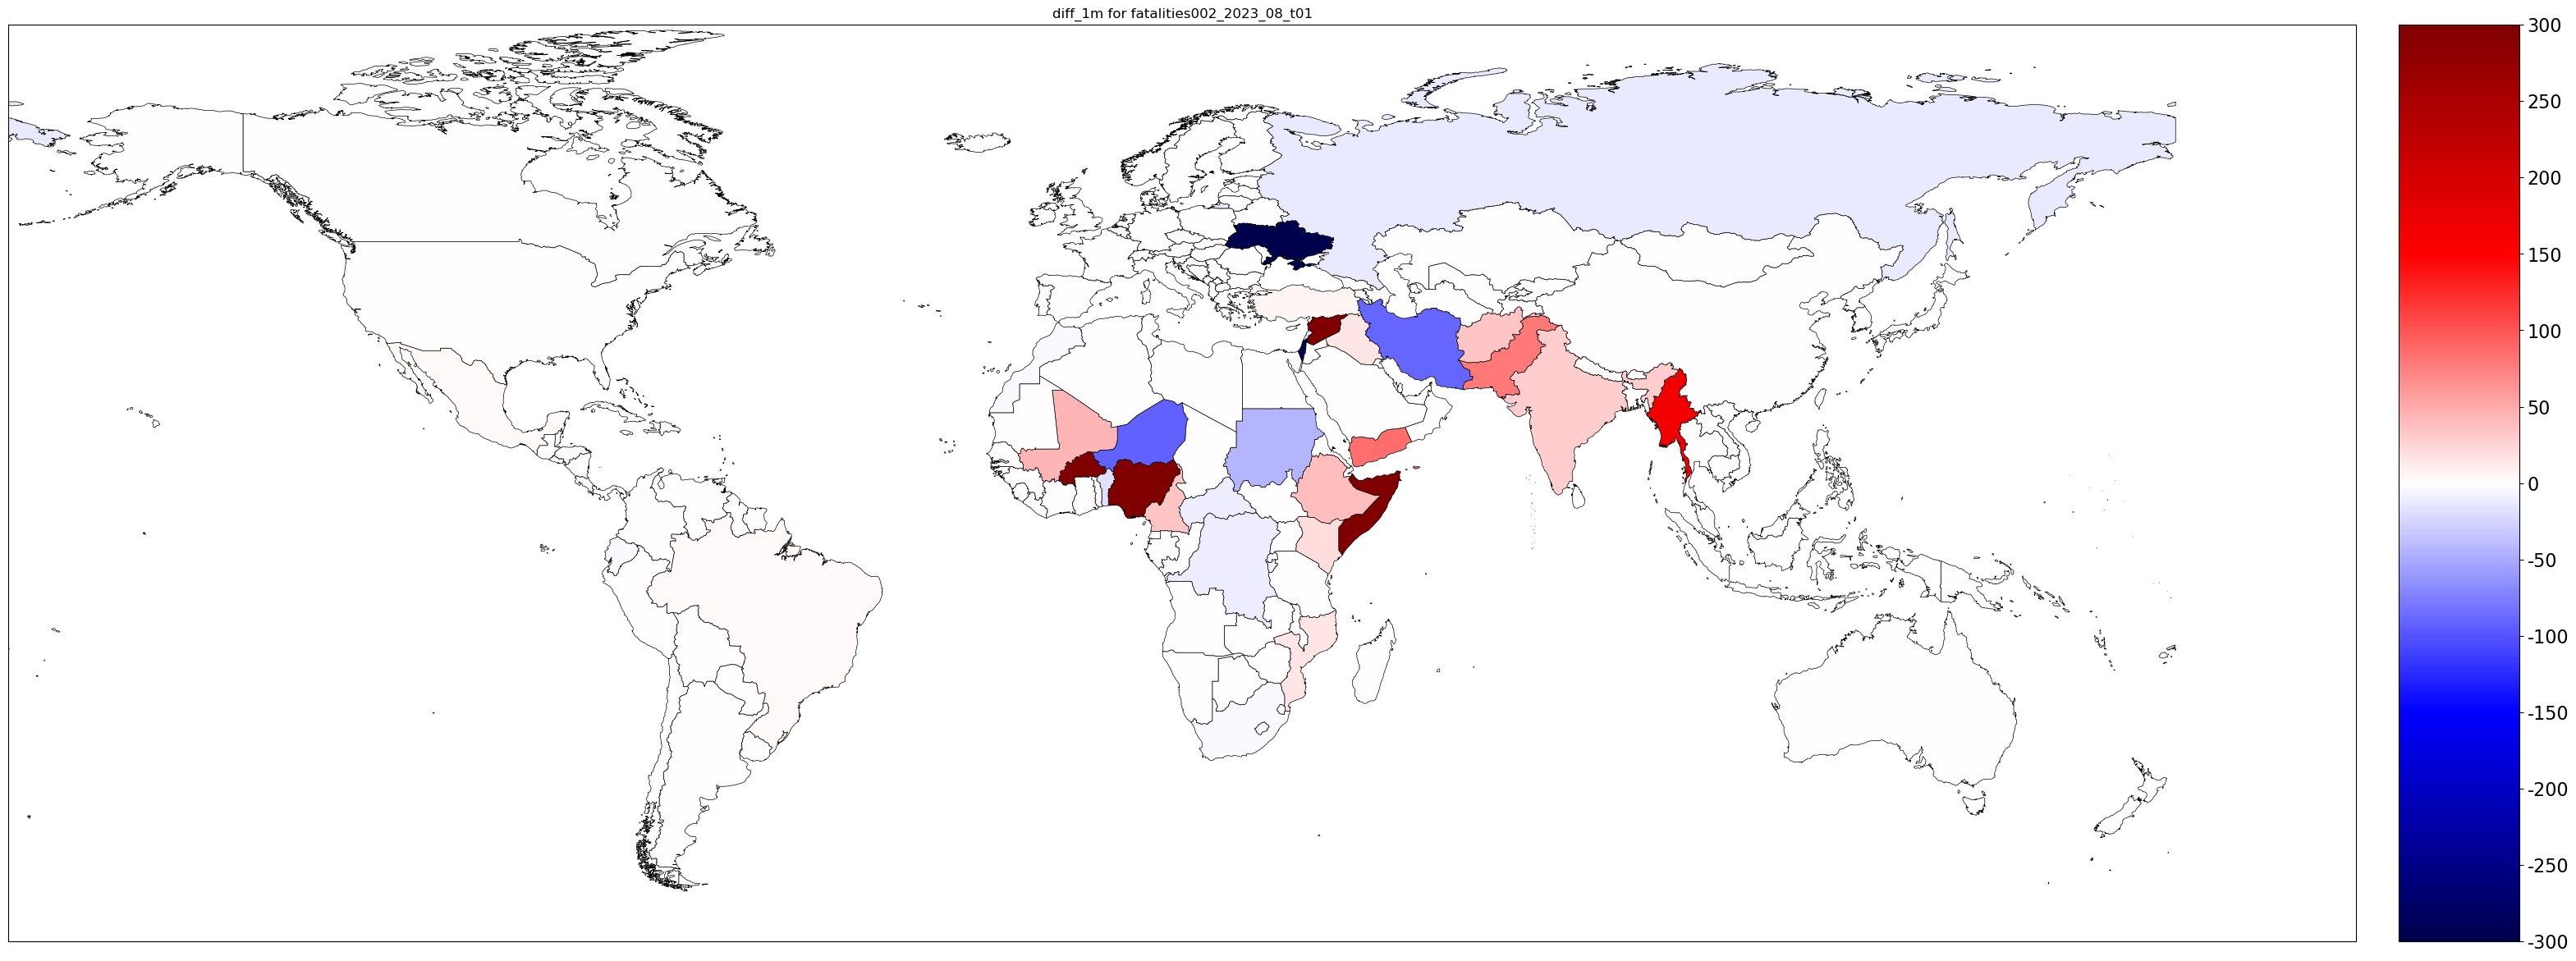

In [78]:
m = Mapper2(
    width=40,
    height=40,
    frame_on=True,
    title=f'{feature} for {dataset}',
    bbox=bbox_from_cid('globe'), 
    figure = None
).add_layer(
    gdf=gdf,#.loc[chosen_month],
    transparency = 1.0,
    edgecolor="black",
    linewidth=0.5,
    cmap = cmap,
    column = f'{transform}'+f'{feature}', 
    map_dictionary = map_dictionary,
)

plt.savefig(my_path+f'{dataset}_{feature}.png', bbox_inches='tight')  # saves the current figure

In [79]:
feature = 'diff_3m'

# diff_1m, diff_3m, diff_6m

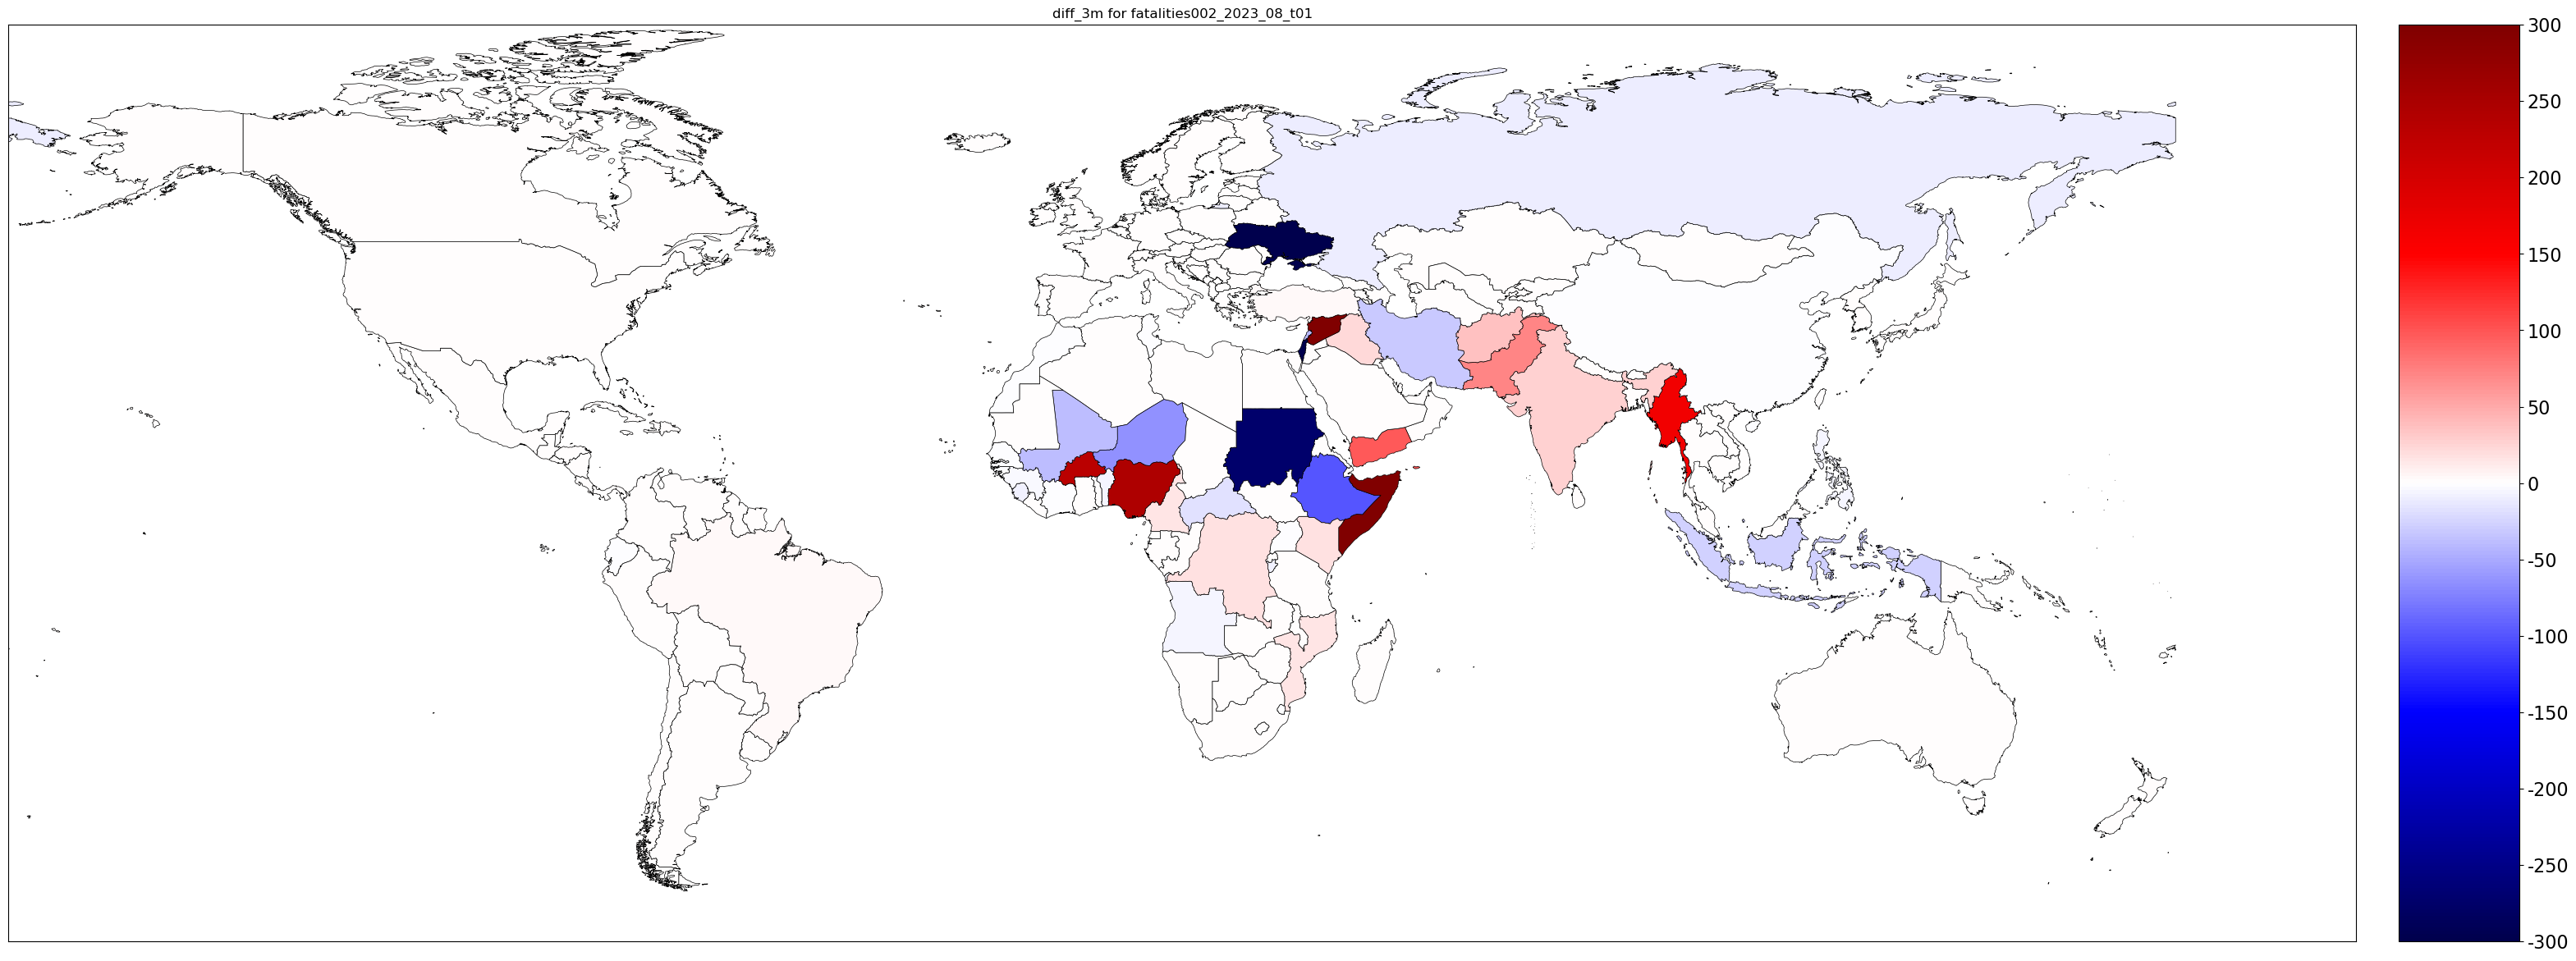

In [80]:
m = Mapper2(
    width=40,
    height=40,
    frame_on=True,
    title=f'{feature} for {dataset}',
    bbox=bbox_from_cid('globe'), 
    figure = None
).add_layer(
    gdf=gdf,#.loc[chosen_month],
    transparency = 1.0,
    edgecolor="black",
    linewidth=0.5,
    cmap = cmap,
    column = f'{transform}'+f'{feature}', 
    map_dictionary = map_dictionary,
)
plt.savefig(my_path+f'{dataset}_{feature}.png', bbox_inches='tight')  # saves the current figure

In [81]:
feature = 'diff_6m'

# diff_1m, diff_3m, diff_6m

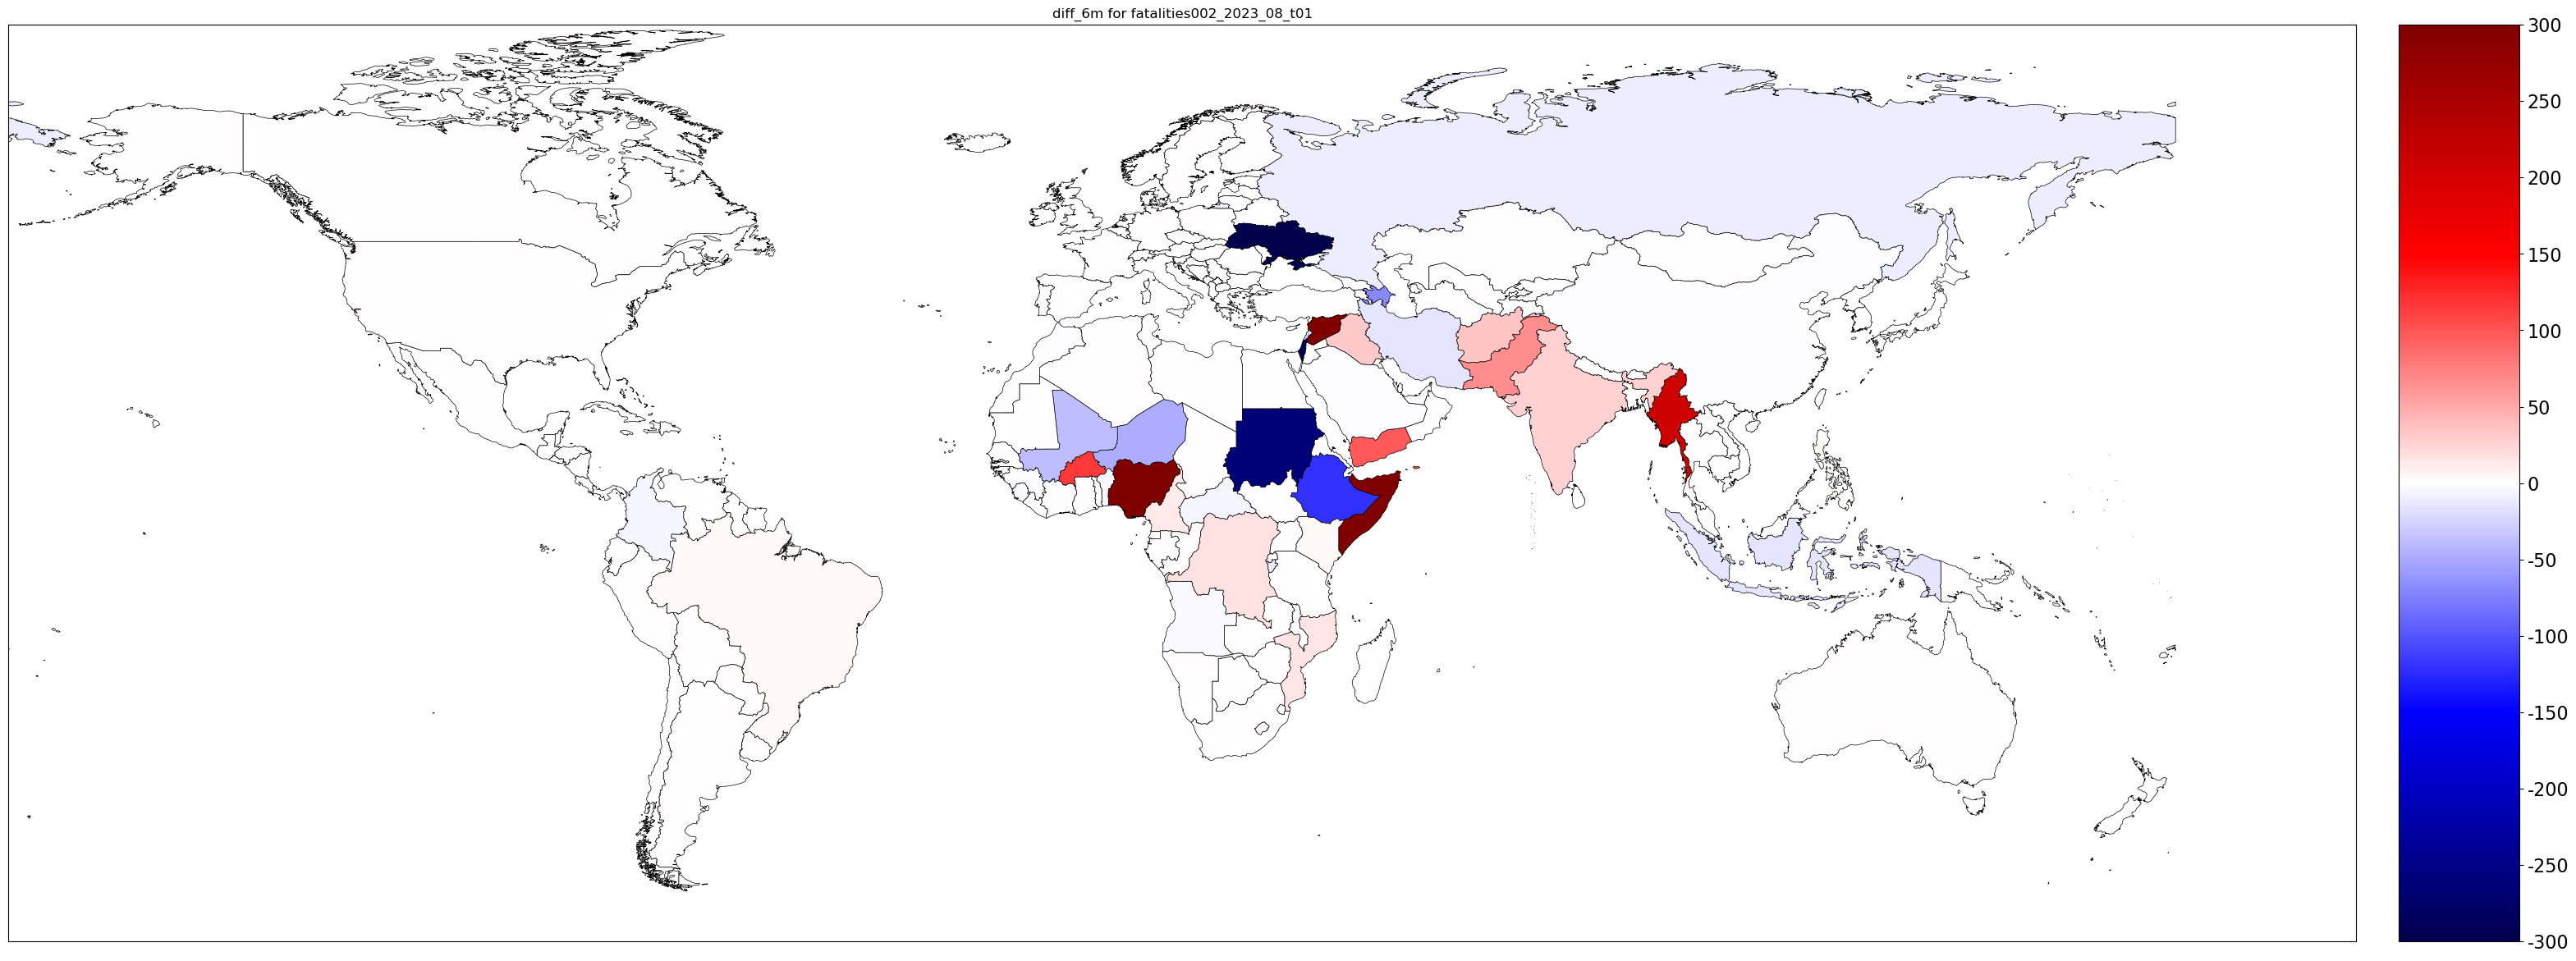

In [82]:
m = Mapper2(
    width=40,
    height=40,
    frame_on=True,
    title=f'{feature} for {dataset}',
    bbox=bbox_from_cid('globe'), 
    figure = None
).add_layer(
    gdf=gdf,#.loc[chosen_month],
    transparency = 1.0,
    edgecolor="black",
    linewidth=0.5,
    cmap = cmap,
    column = f'{transform}'+f'{feature}', 
    map_dictionary = map_dictionary,
)
plt.savefig(my_path+f'{dataset}_{feature}.png', bbox_inches='tight')  # saves the current figure

In [83]:
feature = 'diff_12m'

# diff_1m, diff_3m, diff_6m

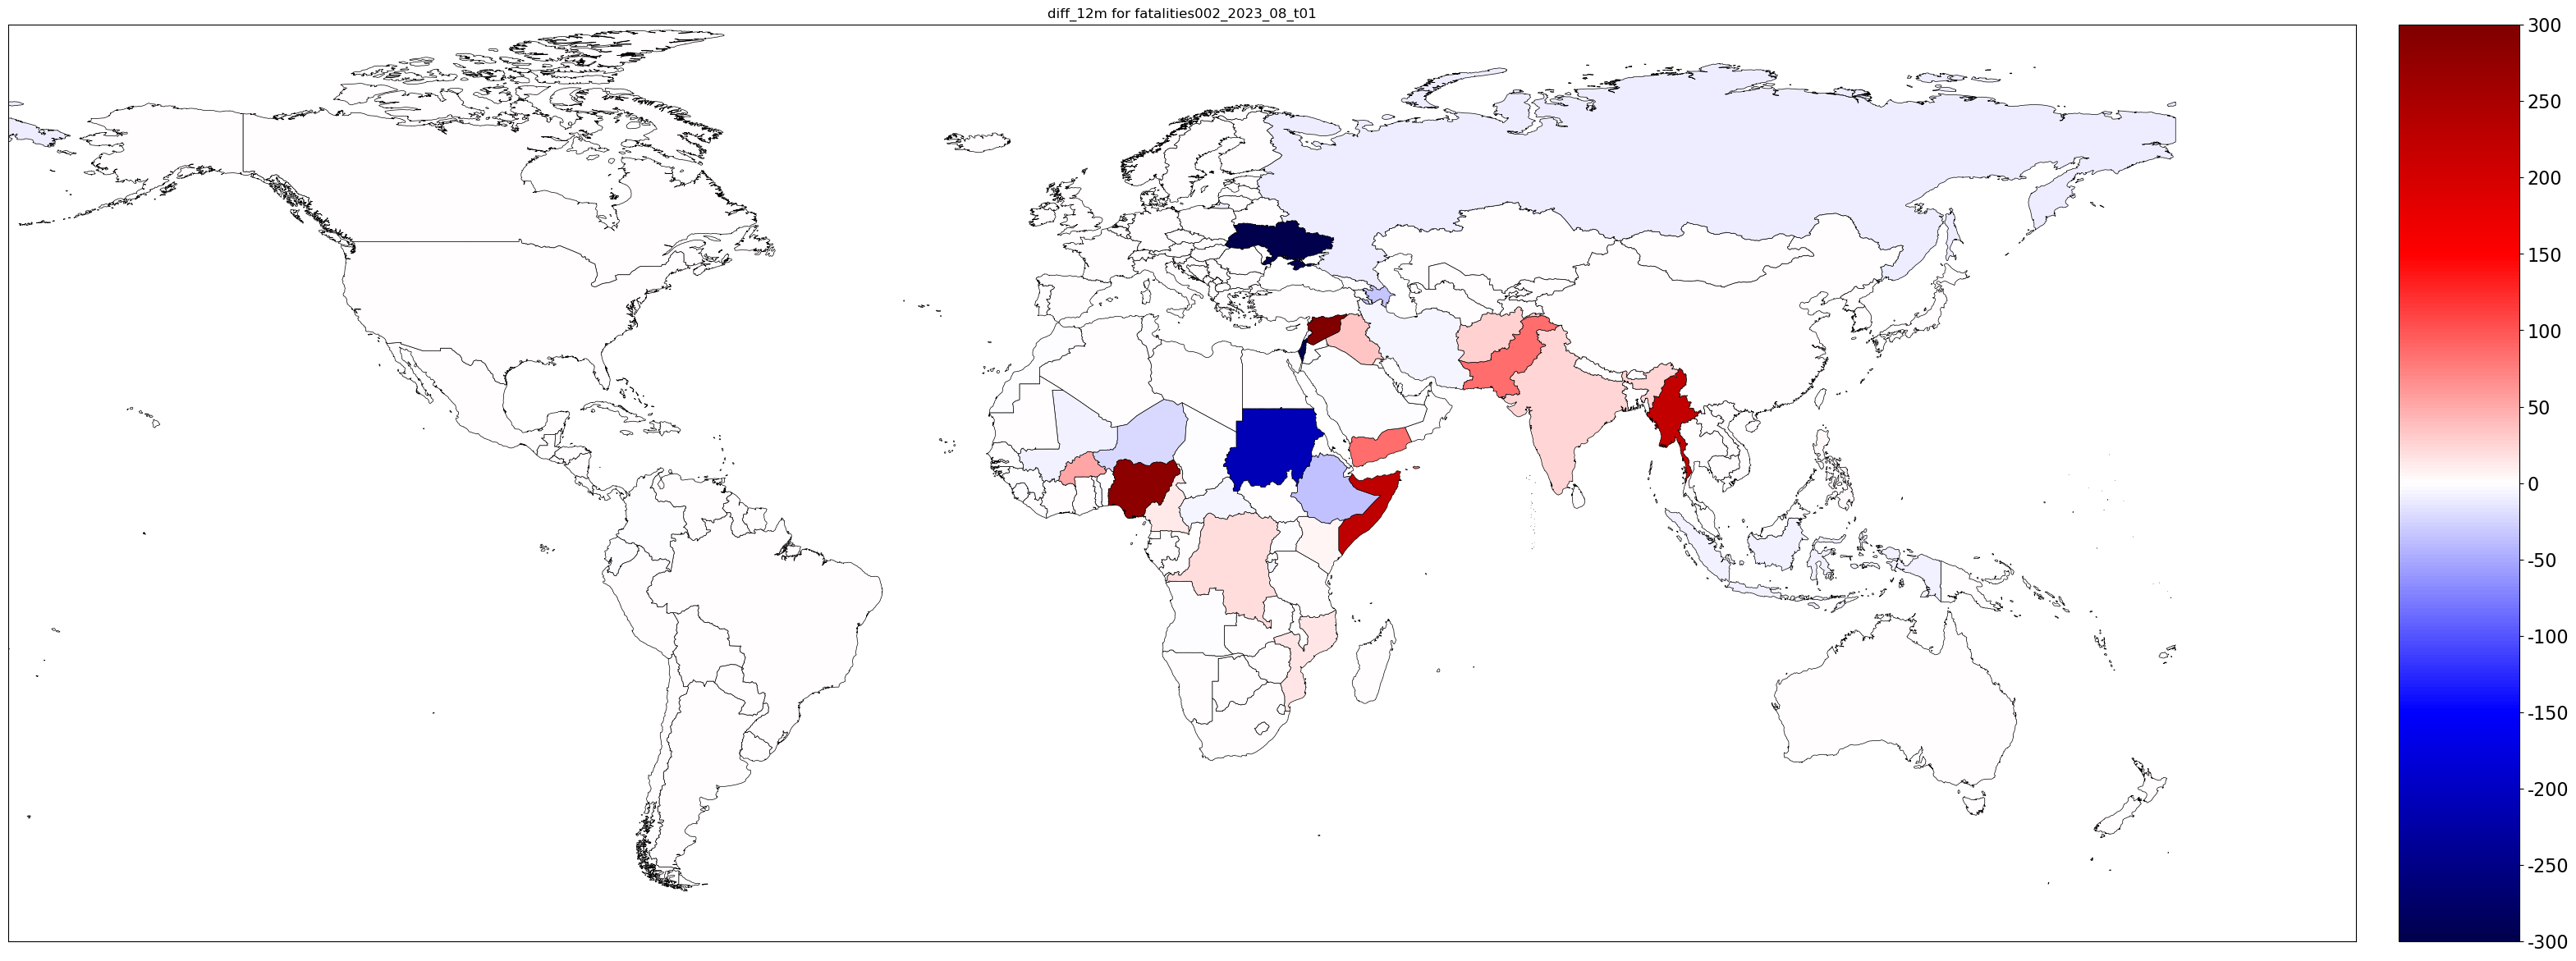

In [84]:
m = Mapper2(
    width=40,
    height=40,
    frame_on=True,
    title=f'{feature} for {dataset}',
    bbox=bbox_from_cid('globe'), 
    figure = None
).add_layer(
    gdf=gdf,#.loc[chosen_month],
    transparency = 1.0,
    edgecolor="black",
    linewidth=0.5,
    cmap = cmap,
    column = f'{transform}'+f'{feature}', 
    map_dictionary = map_dictionary,
)
plt.savefig(my_path+f'{dataset}_{feature}.png', bbox_inches='tight')  # saves the current figure

In [85]:
print('All done!')

All done!
